### **Wine Price Prediction**
---------------
- Fast Campus DataScienceSchool 10th
    - *Project of Linear Regression 4th Team*

## Is expensive wine good wine?





### Object Of This Project
- 와인 가격에 대한 다양한 기준이 존재
- 와인의 가격에 미치는 다양한 영향
     - 소믈리에의 평가 
     - 와이너리 역사 (브랜드 파워)
     - 아센필터 공식 
         - Wine quality = 12.145 + (0.00117 × winter rainfall) + (0.0614 × average growing season temperature) – (0.00386 × harvest rainfall) + (0.02385 × years from 1983)

#### 고전적인 평가 방법과 기존의 예측가설을 합쳐 새로운 모델 구축 *(카테고리형, 서술형 형태의 데이터들의 선형성화!)*

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

![](wine_arc.jpg)

### Dataset column description
- ##### **price: The cost for a bottle of the wine**
- **country: The country that the wine is from**
- ~~description: The review given by the taster~~
- ~~designation: The vineyard within the winery where the grapes that made the wine are from~~
- **points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)**
- *province: The province or state that the wine is from*
- *region_1: The wine growing area in a province or state (ie Napa)*
- *region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank*
- *taster_name*
- ~~taster_twitter_handle~~
- *title: The title of the wine review, which often contains the vintage if you're interested in extracting that feature*
- **variety: The type of grapes used to make the wine (ie Pinot Noir)**
- ~~winery: The winery that made the wine~~

## 0. Intro
## 1. Exploratory Data Analysis
- 1. 0 Select DataSet
- 1. 1 Year by title
- 1. 2 Points Standardization
- 1. 3 Top Country / Variety
- 1. 4 Get Climate Data
    - 1.4.1 Find latitude, longitude by country, province, region
    - 1.4.2 Crawling Website for Weather
    - 1.4.3 Merge
    
## 2. Linear Regeression
- 2. 1 PairPlot / Correlation Coefficient
- 2. 2 OLS 부분회귀

## 1. Exploratory Data Analysis

### 1.0 Select DataSet

In [4]:
# The dataset has 2 different types of data files available
# Let's see what is the difference between them before we proceed..
wine_130k = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
wine_150k = pd.read_csv("winemag-data_first150k.csv", index_col=0)

In [5]:
wine_130k.describe(include='all').T

count  unique  \
country                129908      43   
description            129971  119955   
designation             92506   37979   
points                 129971     NaN   
price                  120975     NaN   
province               129908     425   
region_1               108724    1229   
region_2                50511      17   
taster_name            103727      19   
taster_twitter_handle   98758      15   
title                  129971  118840   
variety                129970     707   
winery                 129971   16757   

                                                                     top  \
country                                                               US   
description            Gravenstein apple, honeysuckle and jasmine aro...   
designation                                                      Reserve   
points                                                               NaN   
price                                                                NaN   
province                                                      California   
region_1                                                     Napa Valley   
region_2                                                   Central Coast   
taster_name                                                   Roger Voss   
taster_twitter_handle                                         @vossroger   
title                  Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...   
variety                                                       Pinot Noir   
winery                                                Wines & Winemakers   

                        freq     mean      std  min  25%  50%  75%   max  
country                54504      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
description                3      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
designation             2009      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
points                   NaN  88.4471  3.03973   80   86   88   91   100  
price                    NaN  35.3634  41.0222    4   17   25   42  3300  
province               36247      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
region_1                4480      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
region_2               11065      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
taster_name            25514      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
taster_twitter_handle  25514      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
title                     11      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
variety                13272      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
winery                   222      NaN      NaN  NaN  NaN  NaN  NaN   NaN

In [6]:
wine_150k.describe(include='all').T

count unique                                                top  \
country      150925     48                                                 US   
description  150930  97821  86-88 This could work as a rich wine, because ...   
designation  105195  30621                                            Reserve   
points       150930    NaN                                                NaN   
price        137235    NaN                                                NaN   
province     150925    455                                         California   
region_1     125870   1236                                        Napa Valley   
region_2      60953     18                                      Central Coast   
variety      150930    632                                         Chardonnay   
winery       150930  14810                                    Williams Selyem   

              freq     mean      std  min  25%  50%  75%   max  
country      62397      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
description      6      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
designation   2752      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
points         NaN  87.8884  3.22239   80   86   88   90   100  
price          NaN  33.1315  36.3225    4   16   24   40  2300  
province     44508      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
region_1      6209      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
region_2     13057      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
variety      14482      NaN      NaN  NaN  NaN  NaN  NaN   NaN  
winery         374      NaN      NaN  NaN  NaN  NaN  NaN   NaN

Since the 150k dataset has 3 less columns and therefore has less information on wine reviews, so for the sake of visual analysis I am using only the 130k dataset for further process.

In [7]:
wine_130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [8]:
wine_130k.shape

(129971, 13)

In [9]:
wine_130k.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [10]:
wine_130k.describe()

points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000

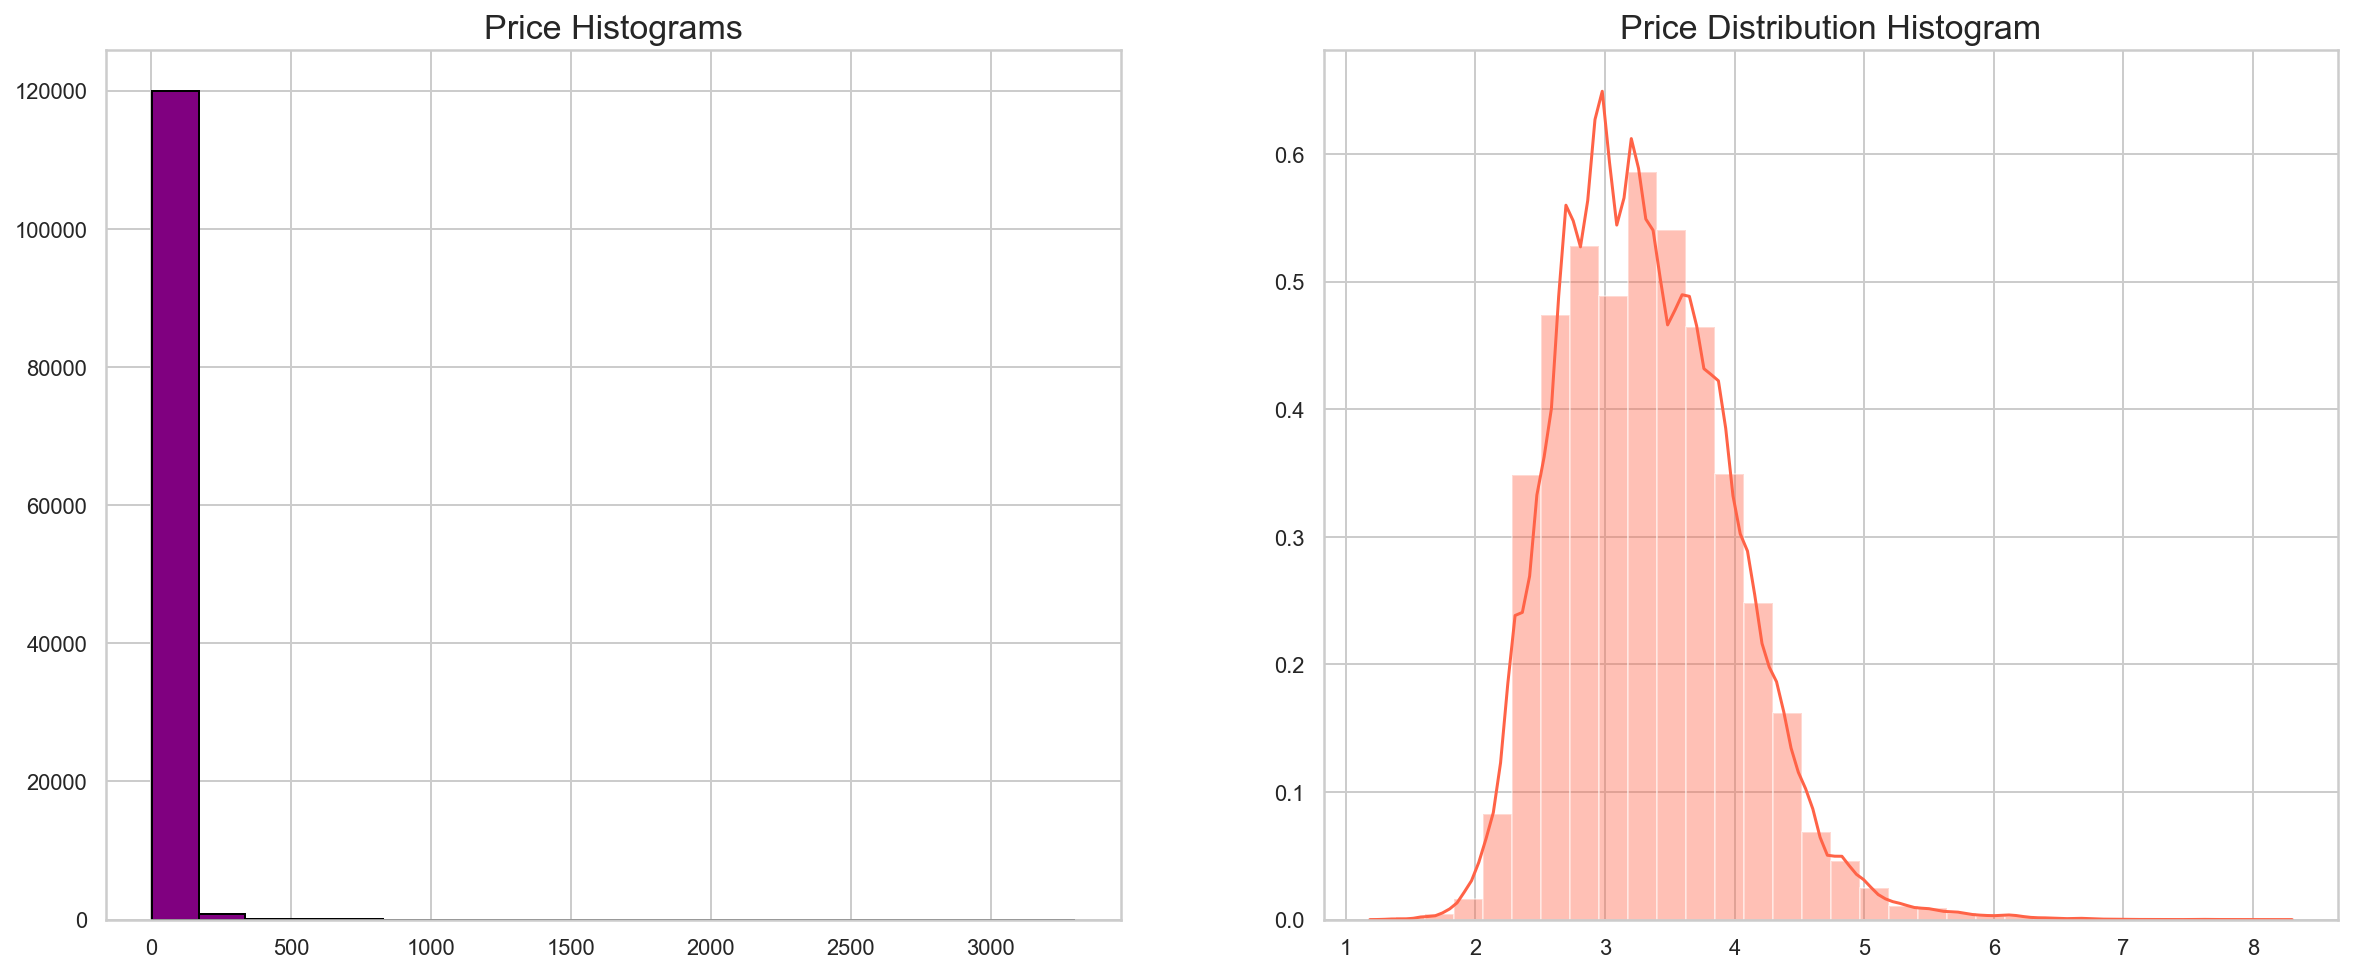

In [11]:
# price histogram
fig,ax = plt.subplots(1,2, figsize=(20,8))
ax1,ax2 = ax.flatten()

wine_130k.price.plot.hist(bins=20, color='Purple', edgecolor='black', ax=ax1);
ax1.set_title('Price Histograms', fontsize=17)
ax1.set_ylabel('')
ax1.set_xlabel('')

log_price = np.log(wine_130k.price)
sns.distplot(log_price,  bins=30, color='tomato', kde=True, ax=ax2)
ax2.set_title("Price Distribution Histogram", fontsize=17)
ax2.set_ylabel("")
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.2);

### 1.1 Year by title

-  price, country, variety의 Nan 제거
-  title에서 year 추출


In [12]:
wine_130k['year'] = wine_130k.title.str.extract('((19|20)\d{2})')[0]

wine_130k = (wine_130k
      .loc[wine_130k.year.notnull()]
      .assign(year = wine_130k.year.astype('float'))
     )
wine_130k.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery    year  
0     White Blend              Nicosia  2013.0  
1  Portuguese Red  Quinta dos Avidagos  2011.0  
2      Pinot Gris            Rainstorm  2013.0  
3        Riesling           St. Julian  2013.0  
4      Pinot Noir         Sweet Cheeks  2012.0

In [13]:
wine_130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125345 entries, 0 to 129970
Data columns (total 14 columns):
country                  125284 non-null object
description              125345 non-null object
designation              88185 non-null object
points                   125345 non-null int64
price                    116825 non-null float64
province                 125284 non-null object
region_1                 104652 non-null object
region_2                 49756 non-null object
taster_name              100185 non-null object
taster_twitter_handle    95320 non-null object
title                    125345 non-null object
variety                  125344 non-null object
winery                   125345 non-null object
year                     125345 non-null float64
dtypes: float64(2), int64(1), object(11)
memory usage: 14.3+ MB


In [14]:
# csv 변환
wine_130k.dropna(subset=['price','country', 'variety'], inplace = True)
wine_130k.drop(columns= ["title"] , axis=1, inplace=True)
wine_130k.to_csv("wine_(1.1).csv")

### 1.2 Points Standardization 

- taster_name 분류
- taster별 point 표준화 "standard_points" 컬럼 생성

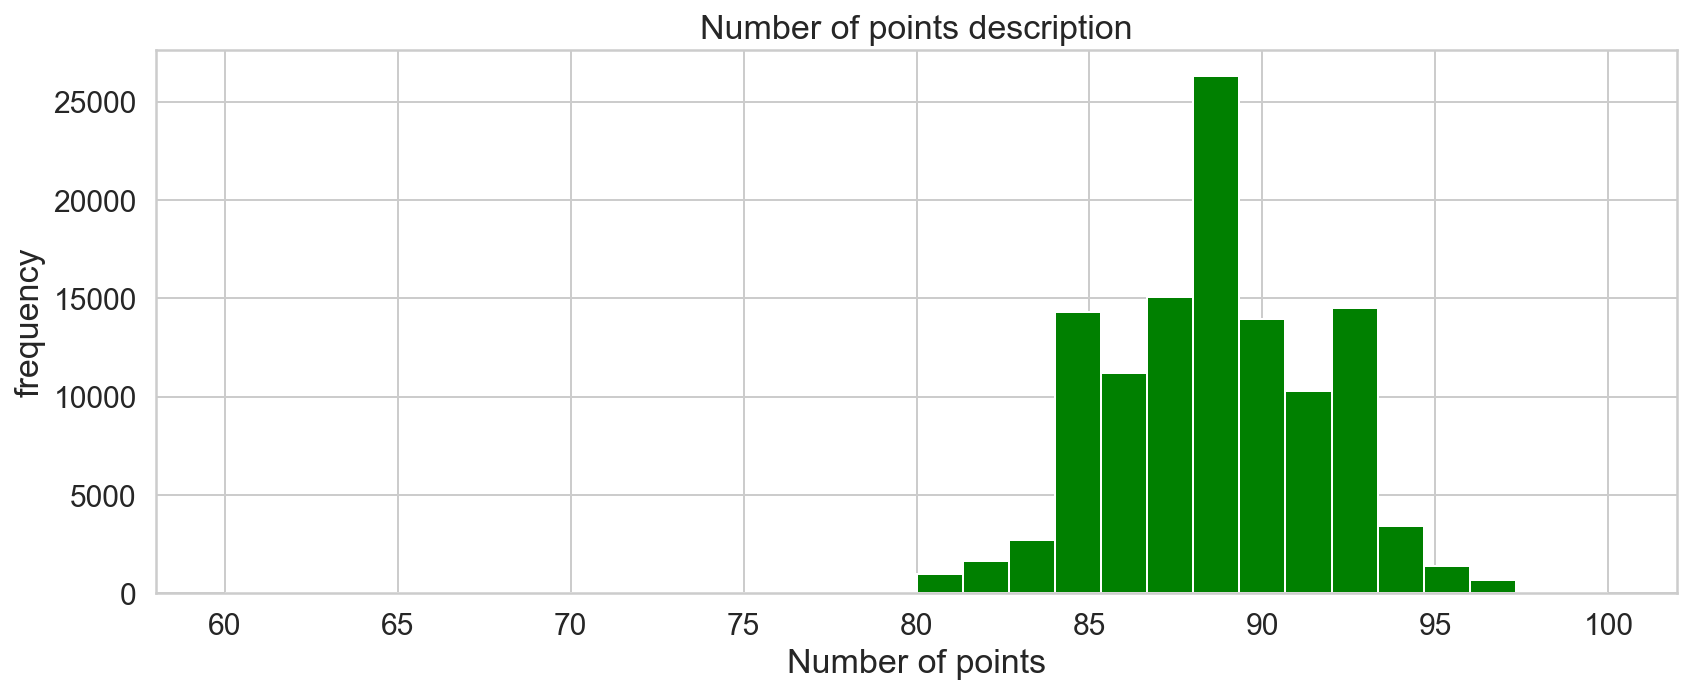

In [15]:
plt.subplot(1, 2, 1)
(wine_130k['points']).plot.hist(bins=30, figsize=(30,5), color = "Green", edgecolor='white',range=[60,100])
plt.xlabel('Number of points', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Number of points description', fontsize=17)
plt.show()

In [16]:
wine_data = pd.read_csv("wine_(1.1).csv")

# taster_name 분류를 위한 문자열 변환
wine_data["taster_number"] = wine_data["taster_name"].astype('str')

# taster_name 정수형 변환
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)

In [17]:
# taster별 dataframe 생성 및 표준화
from sklearn import preprocessing

mapping(wine_data, "taster_number")
wine_tasters = []
for i in range (max(wine_data["taster_number"])+1):
    wine_tasters.append(wine_data[wine_data["taster_number"] == i ])

for wine in wine_tasters:
    wine["standard_points"] = preprocessing.scale(wine["points"])
    
wine_standard_points = pd.DataFrame(columns=["points", "taster_name"])
while len(wine_tasters) > 0 :
    wine_standard_points = pd.concat([wine_standard_points, wine_tasters[0]])
    del wine_tasters[0]

In [18]:
wine_standard_points[["year", "price", "points"]] = wine_standard_points[["year", "price", "points"]].astype("int")
wine_standard_points.sort_index(inplace=True)

In [19]:
wine_standard_points.head()

Unnamed: 0   country                                        description  \
0         1.0  Portugal  This is ripe and fruity, a wine that is smooth...   
1         2.0        US  Tart and snappy, the flavors of lime flesh and...   
2         3.0        US  Pineapple rind, lemon pith and orange blossom ...   
3         4.0        US  Much like the regular bottling from 2012, this...   
4         5.0     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
0                            Avidagos      87     15           Douro   
1                                 NaN      87     14          Oregon   
2                Reserve Late Harvest      87     13        Michigan   
3  Vintner's Reserve Wild Child Block      87     65          Oregon   
4                        Ars In Vitro      87     15  Northern Spain   

              region_1           region_2  standard_points  \
0                  NaN                NaN        -0.530399   
1    Willamette Valley  Willamette Valley        -0.751016   
2  Lake Michigan Shore                NaN         0.564678   
3    Willamette Valley  Willamette Valley        -0.751016   
4              Navarra                NaN         0.026242   

          taster_name  taster_number taster_twitter_handle  \
0          Roger Voss            4.0            @vossroger   
1        Paul Gregutt            5.0           @paulgwine    
2  Alexander Peartree           19.0                   NaN   
3        Paul Gregutt            5.0           @paulgwine    
4   Michael Schachner            7.0           @wineschach   

              variety               winery  year  
0      Portuguese Red  Quinta dos Avidagos  2011  
1          Pinot Gris            Rainstorm  2013  
2            Riesling           St. Julian  2013  
3          Pinot Noir         Sweet Cheeks  2012  
4  Tempranillo-Merlot               Tandem  2011

### 1.3 Top Country / Variety 

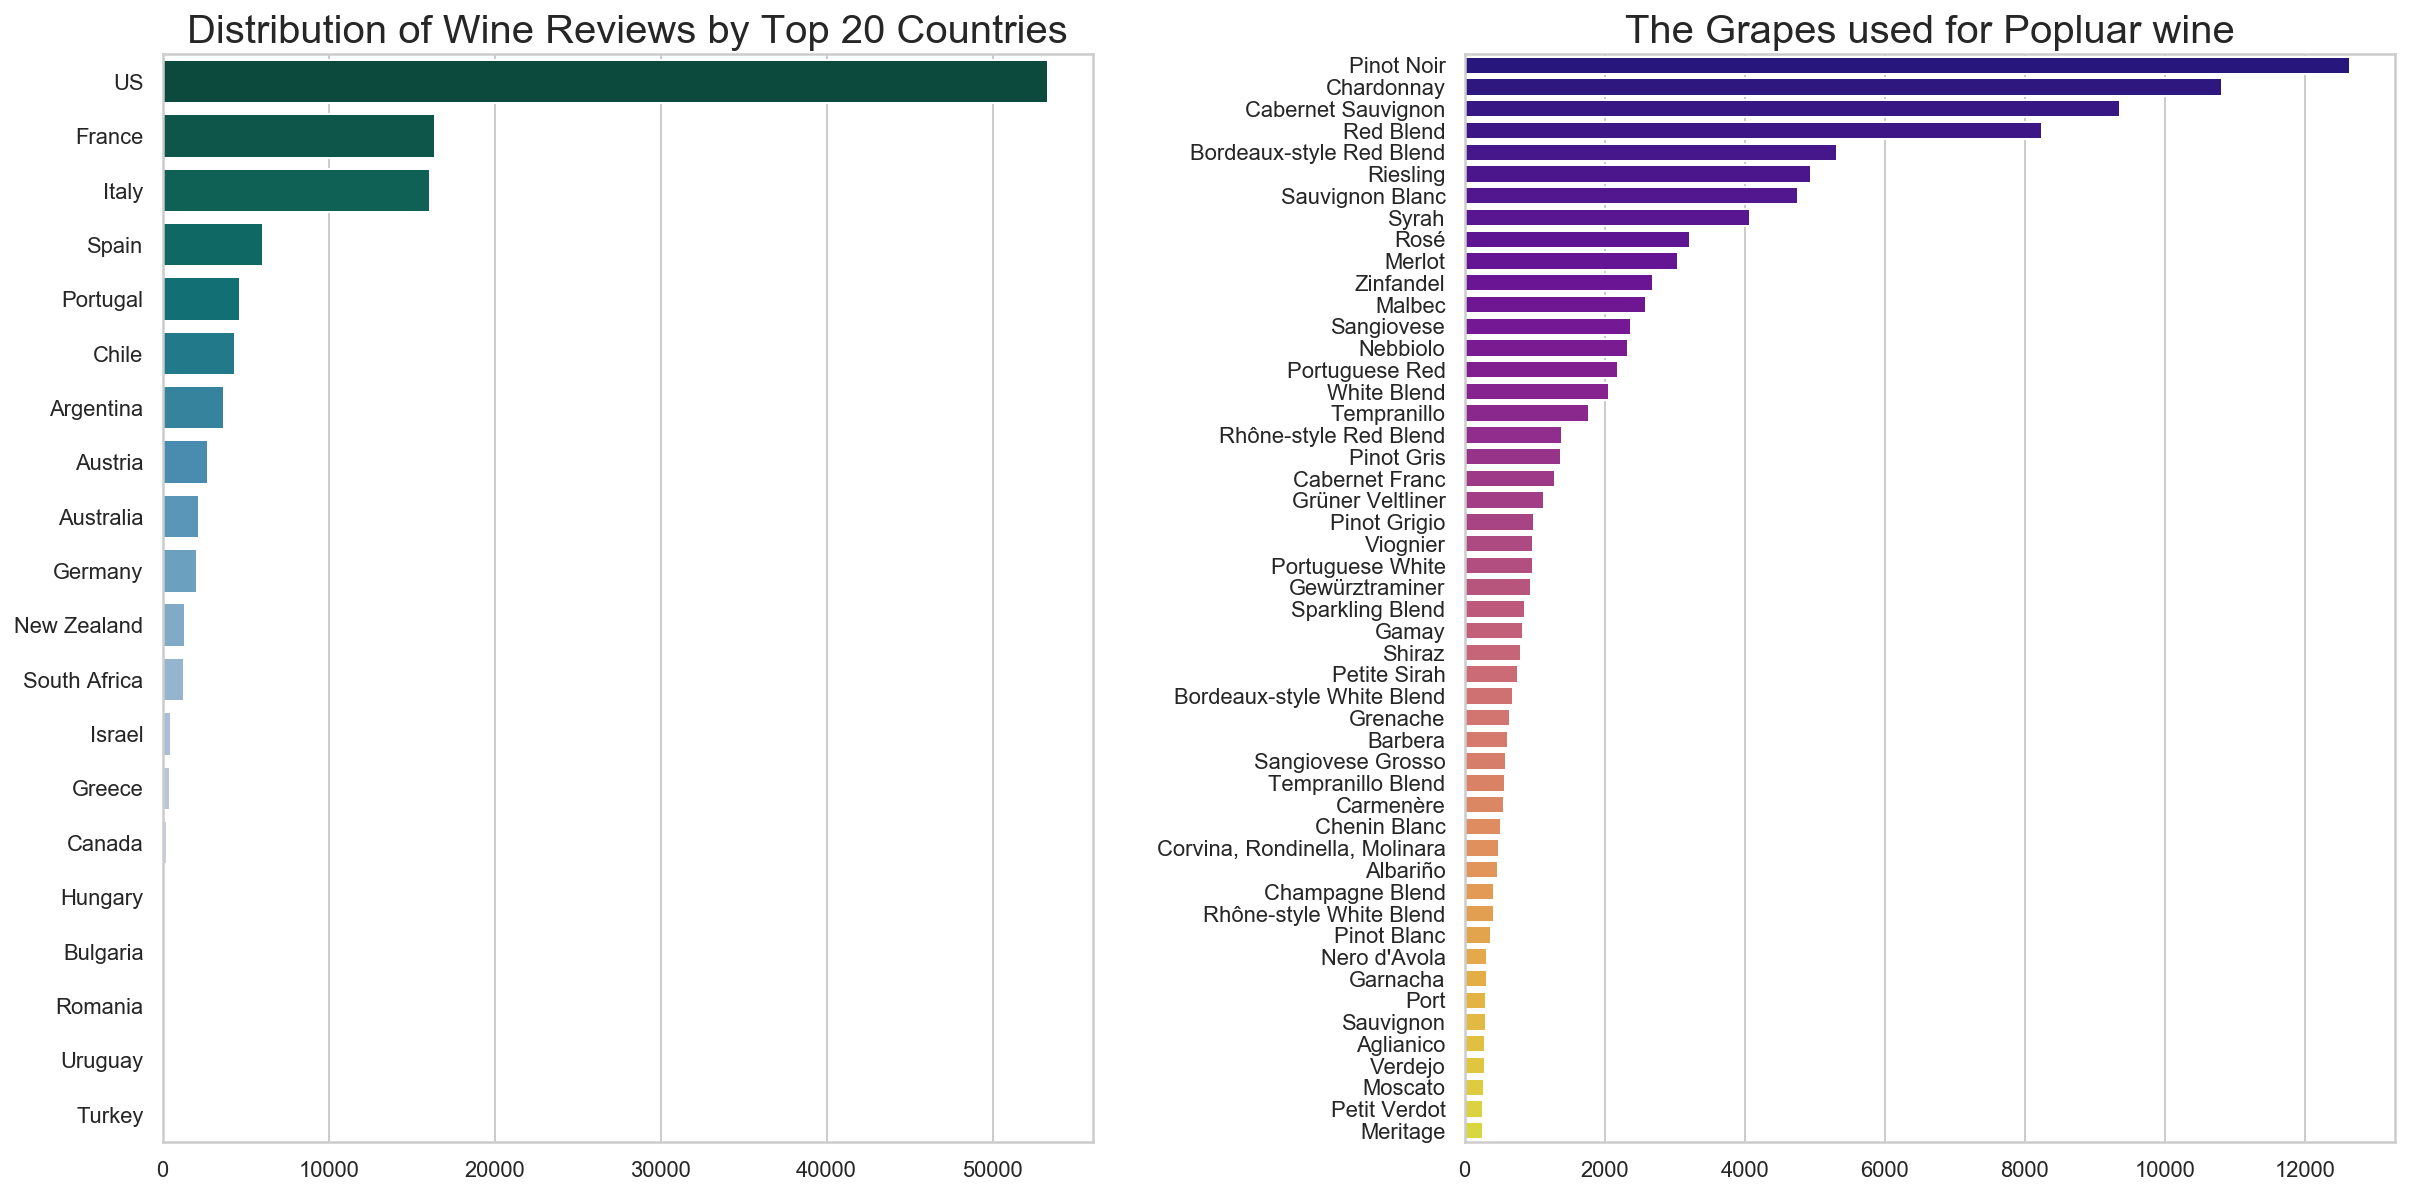

In [20]:
fig,ax = plt.subplots(1,2, figsize=(20,10))
ax1,ax2 = ax.flatten()

cnt = wine_standard_points['country'].value_counts().to_frame()[:20]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='PuBuGn_r',orient='h', ax=ax1)
ax1.set_title('Distribution of Wine Reviews by Top 20 Countries',  fontsize=20)
ax1.set_ylabel('')
ax1.set_xlabel('')

cnt = wine_standard_points['variety'].value_counts().to_frame()[:50]
sns.barplot(x= cnt['variety'], y =cnt.index, data=cnt, palette='plasma',orient='h', ax=ax2)
ax2.set_title('The Grapes used for Popluar wine', fontsize=20)
ax2.set_ylabel("")
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.4);

#### - 추후 순위권 country 선정 후 모델 비교
- 동일 포도품종명 변경 (ex. Shiraz = Syrah, Rosato = Rosé, Primitivo =Zinfandel)
- 포도종별 count로 "rank" 컬럼 생성

In [22]:
# 동일 포도품종명 변경
variety_to = {
    "Shiraz" : 'Syrah',
    "Fumé Blanc" : "Sauvignon Blanc", 
    "Sauvignon" : "Sauvignon Blanc",
    "Primitivo" : "Zinfandel",
    "Zierfandler" : "Zinfandel",
    "Rosato" : "Rosé"
}
wine_standard_points["variety"] = wine_standard_points["variety"].replace(variety_to)

In [23]:
# 포도종별 count 를 rank로 변환
wine_rank = wine_standard_points.groupby("variety").size().rank(ascending=0)
variety_rank = pd.DataFrame(wine_rank, columns=["rank"])
adjust_country_variety = pd.merge(wine_standard_points, variety_rank, on=["variety"], how="outer")
adjust_country_variety = adjust_country_variety.sort_values(by="Unnamed: 0")

In [24]:
adjust_country_variety.head()

Unnamed: 0   country  \
0             1.0  Portugal   
2192          2.0        US   
3574          3.0        US   
8521          4.0        US   
21170         5.0     Spain   

                                             description  \
0      This is ripe and fruity, a wine that is smooth...   
2192   Tart and snappy, the flavors of lime flesh and...   
3574   Pineapple rind, lemon pith and orange blossom ...   
8521   Much like the regular bottling from 2012, this...   
21170  Blackberry and raspberry aromas show a typical...   

                              designation  points  price        province  \
0                                Avidagos      87     15           Douro   
2192                                  NaN      87     14          Oregon   
3574                 Reserve Late Harvest      87     13        Michigan   
8521   Vintner's Reserve Wild Child Block      87     65          Oregon   
21170                        Ars In Vitro      87     15  Northern Spain   

                  region_1           region_2  standard_points  \
0                      NaN                NaN        -0.530399   
2192     Willamette Valley  Willamette Valley        -0.751016   
3574   Lake Michigan Shore                NaN         0.564678   
8521     Willamette Valley  Willamette Valley        -0.751016   
21170              Navarra                NaN         0.026242   

              taster_name  taster_number taster_twitter_handle  \
0              Roger Voss            4.0            @vossroger   
2192         Paul Gregutt            5.0           @paulgwine    
3574   Alexander Peartree           19.0                   NaN   
8521         Paul Gregutt            5.0           @paulgwine    
21170   Michael Schachner            7.0           @wineschach   

                  variety               winery  year   rank  
0          Portuguese Red  Quinta dos Avidagos  2011   15.0  
2192           Pinot Gris            Rainstorm  2013   19.0  
3574             Riesling           St. Julian  2013    7.0  
8521           Pinot Noir         Sweet Cheeks  2012    1.0  
21170  Tempranillo-Merlot               Tandem  2011  329.5

In [25]:
adjust_country_variety.to_csv("wine_(1.2&3).csv")

## 1.4 Get Climate Data

- ### 1.4.1  Find latitude, longitude by country, province, region

    - groupby[country, province, region_1]로 1585개의 location 생성
    - geopy의 geocoder를 이용한 위도/경도 매칭
 

In [ ]:
lat_lng = pd.read_csv("lat_lng_name_location_by_geopy_(1.4.1).csv")

- ### 1.4.2 Crawling Website for Weather
    - https://climatedata.worldbank.org 에서 위도,경도, 연도범위, 타입으로 크롤링하여 데이터 셋 저장
         - 1585개의 location을 300개씩 나누어 thread 이용
         - 저장된 강수량 데이터와 기후 데이터를 불러서 사용
         - weather_data_crawling.ipynb 파일 참조
     - 월별 강수량, 기온에서 min, max, avg, std 등 새로운 컬럼 추가

In [36]:
# 기온/강수량 데이터 불러오기
prDf_new = pd.read_csv("prDf_new.csv")
tasDf_new = pd.read_csv("tasDf_new.csv")

# "No Data"로 입력된 컬럼 비슷한 지역으로 대체
tasDf_new.loc[969] = tasDf_new.loc[1356] 
prDf_new.loc[968] = prDf_new.loc[1352] 

# 형식 변환
prDf_new["pr"] = prDf_new["pr"].apply(eval)
tasDf_new["tas"] = tasDf_new["tas"].apply(eval)

In [37]:
# 월별 기온/강수량 분류
months_rain = ["Jan_rain","Feb_rain","Mar_rain","Apr_rain","May_rain","Jun_rain","Jul_rain","Aug_rain","Sep_rain","Oct_rain","Nov_rain","Dec_rain"]
months_temp = ["Jan_temp","Feb_temp","Mar_temp","Apr_temp","May_temp","Jun_temp","Jul_temp","Aug_temp","Sep_temp","Oct_temp","Nov_temp","Dec_temp"]

for idx, (month_rain, month_temp) in enumerate(zip(months_rain,months_temp)):
    prDf_new[month_rain] = prDf_new["pr"].apply(lambda x : x[idx])
    tasDf_new[month_temp] = tasDf_new["tas"].apply(lambda x: x[idx])

prDf_new_1 = prDf_new.drop(columns=["Unnamed: 0", "pr"])
tasDf_new_1 = tasDf_new.drop(columns=["Unnamed: 0", "tas"])
prDf_new_1 = prDf_new_1.drop_duplicates()
prDf_new_1 = prDf_new_1.sort_values(by=["latitude", "longitude"])
tasDf_new_1 = tasDf_new_1.drop_duplicates()
tasDf_new_1 = tasDf_new_1.sort_values(by=["latitude", "longitude"])

In [38]:
# 기온/강수량 합쳐 하나의 weather 데이터 만들기
weather_lat_lng = pd.merge(prDf_new_1, tasDf_new_1, on=["latitude"], how="left")
weather_lat_lng = weather_lat_lng.round(5)
weather_lat_lng.head()

latitude  longitude_x  Jan_rain  Feb_rain  Mar_rain  Apr_rain   May_rain  \
0 -45.12999    169.52488  56.81154  53.93846  60.57692  43.68846   47.30385   
1 -44.91291    170.99163  60.34615  52.08077  62.68462  57.70000   58.06923   
2 -43.58656    171.21233  61.23462  58.22308  54.61539  66.47692   64.00769   
3 -43.49418    171.80984  89.49615  73.20000  71.70385  96.79231  113.06154   
4 -43.10523    172.76793  44.21923  48.87692  50.52692  55.78077   59.66539   

    Jun_rain   Jul_rain   Aug_rain    ...     Mar_temp  Apr_temp  May_temp  \
0   48.60385   42.17692   48.95000    ...     11.67692   8.25385   4.81923   
1   58.94231   60.53462   69.59615    ...     12.75769  10.22692   7.40000   
2   71.57307   72.52692   88.64231    ...     11.92308   9.20000   6.26923   
3  117.05769  111.95000  127.30000    ...     11.99231   9.29615   6.36154   
4   55.83846   62.36923   60.78846    ...     14.91154  12.38077   9.75769   

   Jun_temp  Jul_temp  Aug_temp  Sep_temp  Oct_temp  Nov_temp  Dec_temp  
0   1.55769   0.96154   2.99231   5.82692   8.29615   9.97308  12.46538  
1   4.63462   3.84231   5.27308   7.61538   9.48846  11.16538  13.24615  
2   3.51538   2.65000   3.94615   6.19615   8.36539   9.84231  11.95385  
3   3.50769   2.65769   4.03077   6.46923   8.25385  10.14231  12.45000  
4   7.20385   6.27308   7.44231   9.70385  11.56154  13.15000  15.35769  

[5 rows x 27 columns]

In [39]:
# 기온/강수량의 대표값 컬럼 생성
wine_temp = weather_lat_lng[months_temp]
wine_rain = weather_lat_lng[months_rain]

weather_lat_lng["max_temp"] = wine_temp.max(axis=1, skipna= False)
weather_lat_lng["min_temp"] = wine_temp.min(axis=1, skipna= False)
weather_lat_lng["mean_temp"] = wine_temp.mean(axis=1, skipna= False)
weather_lat_lng["var_temp"] = wine_temp.mad(axis=1, skipna= False)

weather_lat_lng["max_rain"] = wine_rain.max(axis=1, skipna= False)
weather_lat_lng["min_rain"] = wine_rain.min(axis=1, skipna= False)
weather_lat_lng["mean_rain"] = wine_rain.mean(axis=1, skipna= False)
weather_lat_lng["var_rain"] = wine_rain.mad(axis=1, skipna= False)

weather_lat_lng.rename(columns={"longitude_x" : "longitude"}, inplace=True)

In [40]:
weather_lat_lng.head()

latitude  longitude  Jan_rain  Feb_rain  Mar_rain  Apr_rain   May_rain  \
0 -45.12999  169.52488  56.81154  53.93846  60.57692  43.68846   47.30385   
1 -44.91291  170.99163  60.34615  52.08077  62.68462  57.70000   58.06923   
2 -43.58656  171.21233  61.23462  58.22308  54.61539  66.47692   64.00769   
3 -43.49418  171.80984  89.49615  73.20000  71.70385  96.79231  113.06154   
4 -43.10523  172.76793  44.21923  48.87692  50.52692  55.78077   59.66539   

    Jun_rain   Jul_rain   Aug_rain    ...      Nov_temp  Dec_temp  max_temp  \
0   48.60385   42.17692   48.95000    ...       9.97308  12.46538  13.96923   
1   58.94231   60.53462   69.59615    ...      11.16538  13.24615  14.75769   
2   71.57307   72.52692   88.64231    ...       9.84231  11.95385  13.93846   
3  117.05769  111.95000  127.30000    ...      10.14231  12.45000  14.24615   
4   55.83846   62.36923   60.78846    ...      13.15000  15.35769  16.67308   

   min_temp  mean_temp  var_temp   max_rain  min_rain   mean_rain   var_rain  
0   0.96154   7.873718  3.868483   65.37692  42.17692   51.498718   6.581837  
1   3.84231   9.591345  3.215703   73.01154  47.08077   60.716027   5.860471  
2   2.65000   8.458013  3.300963   88.64231  54.04231   67.731412   8.681517  
3   2.65769   8.616346  3.402884  146.11154  71.70385  106.458334  16.873610  
4   6.27308  11.754488  3.097435   62.36923  41.73077   52.442948   5.883333  

[5 rows x 35 columns]

- ### 1.4.3 merge
    - latitude, longitude와 crawling data merge
    - 1.2, 1.3의 데이터와 merge
 
    

In [41]:
lat_lng = pd.read_csv("lat_lng_name_location_by_geopy_(1.4.1).csv")
lat_lng.loc[lat_lng["province"] == 'Beira Interior', 'latitude'] = 40.033265
lat_lng.loc[lat_lng["province"] == 'Beira Interior', 'longitude'] = -7.889626
lat_lng.loc[lat_lng["province"] == 'Beira Interior', 'name'] = 'Portugal'
lat_lng = lat_lng.round(5)

In [42]:
merge_weather = pd.merge(lat_lng, weather_lat_lng, on=["latitude", "longitude"], how="left")
merge_weather = merge_weather.drop_duplicates()

In [43]:
wine_last_raw = pd.merge(adjust_country_variety, merge_weather, on =["country", "province","region_1"], how="left")
wine_raw_data = wine_last_raw.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'longitude_y'])
wine_raw_data = wine_raw_data.reset_index()

In [44]:
wine_raw_data.head()

index   country                                        description  \
0      0  Portugal  This is ripe and fruity, a wine that is smooth...   
1      1        US  Tart and snappy, the flavors of lime flesh and...   
2      2        US  Pineapple rind, lemon pith and orange blossom ...   
3      3        US  Much like the regular bottling from 2012, this...   
4      4     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
0                            Avidagos      87     15           Douro   
1                                 NaN      87     14          Oregon   
2                Reserve Late Harvest      87     13        Michigan   
3  Vintner's Reserve Wild Child Block      87     65          Oregon   
4                        Ars In Vitro      87     15  Northern Spain   

              region_1           region_2  standard_points    ...      \
0                  NaN                NaN        -0.530399    ...       
1    Willamette Valley  Willamette Valley        -0.751016    ...       
2  Lake Michigan Shore                NaN         0.564678    ...       
3    Willamette Valley  Willamette Valley        -0.751016    ...       
4              Navarra                NaN         0.026242    ...       

   Nov_temp  Dec_temp  max_temp min_temp  mean_temp  var_temp   max_rain  \
0   8.75000   5.91538  21.09231  5.40000  12.754807  4.943270  131.56154   
1   7.33462   4.41154  20.14231  4.41154  11.690064  4.893911  187.53847   
2   3.09231  -2.45385  21.33462 -5.78846   8.063782  8.613141   88.47693   
3   7.33462   4.41154  20.14231  4.41154  11.690064  4.893911  187.53847   
4  10.06923   6.91154  25.93462  6.64231  15.327245  6.084937   68.66538   

   min_rain  mean_rain   var_rain  
0  14.79231  72.769873  28.428739  
1  13.90769  93.524041  46.332374  
2  40.41539  68.891991  16.025374  
3  13.90769  93.524041  46.332374  
4   3.83462  37.987822  15.204059  

[5 rows x 54 columns]

In [45]:
wine_raw_data.to_csv("wine_(1.4).csv", mode="w")

### Variable
-------

##### x (종속변수) 
        - 실수형 : (standard) points, year, variety_rank, Temperatures/Precipitation per month
        - 범주형 : country, taster_name, variety, winery
##### y (독립변수)
        -  (log) price

## 2. Linear Regeression

### 2. 1 PairPlot / Correlation Coefficient

In [46]:
wine = wine_raw_data.copy()
wine["log_price"] = np.log(wine.price)
wine_plot = wine[['log_price', "country", 'points', 'price', 'standard_points', 'taster_number', 'variety',  'year', 'rank', 'max_temp', 'min_temp', 'mean_temp', 'var_temp', 'max_rain', 'min_rain', 'mean_rain', 'var_rain']]

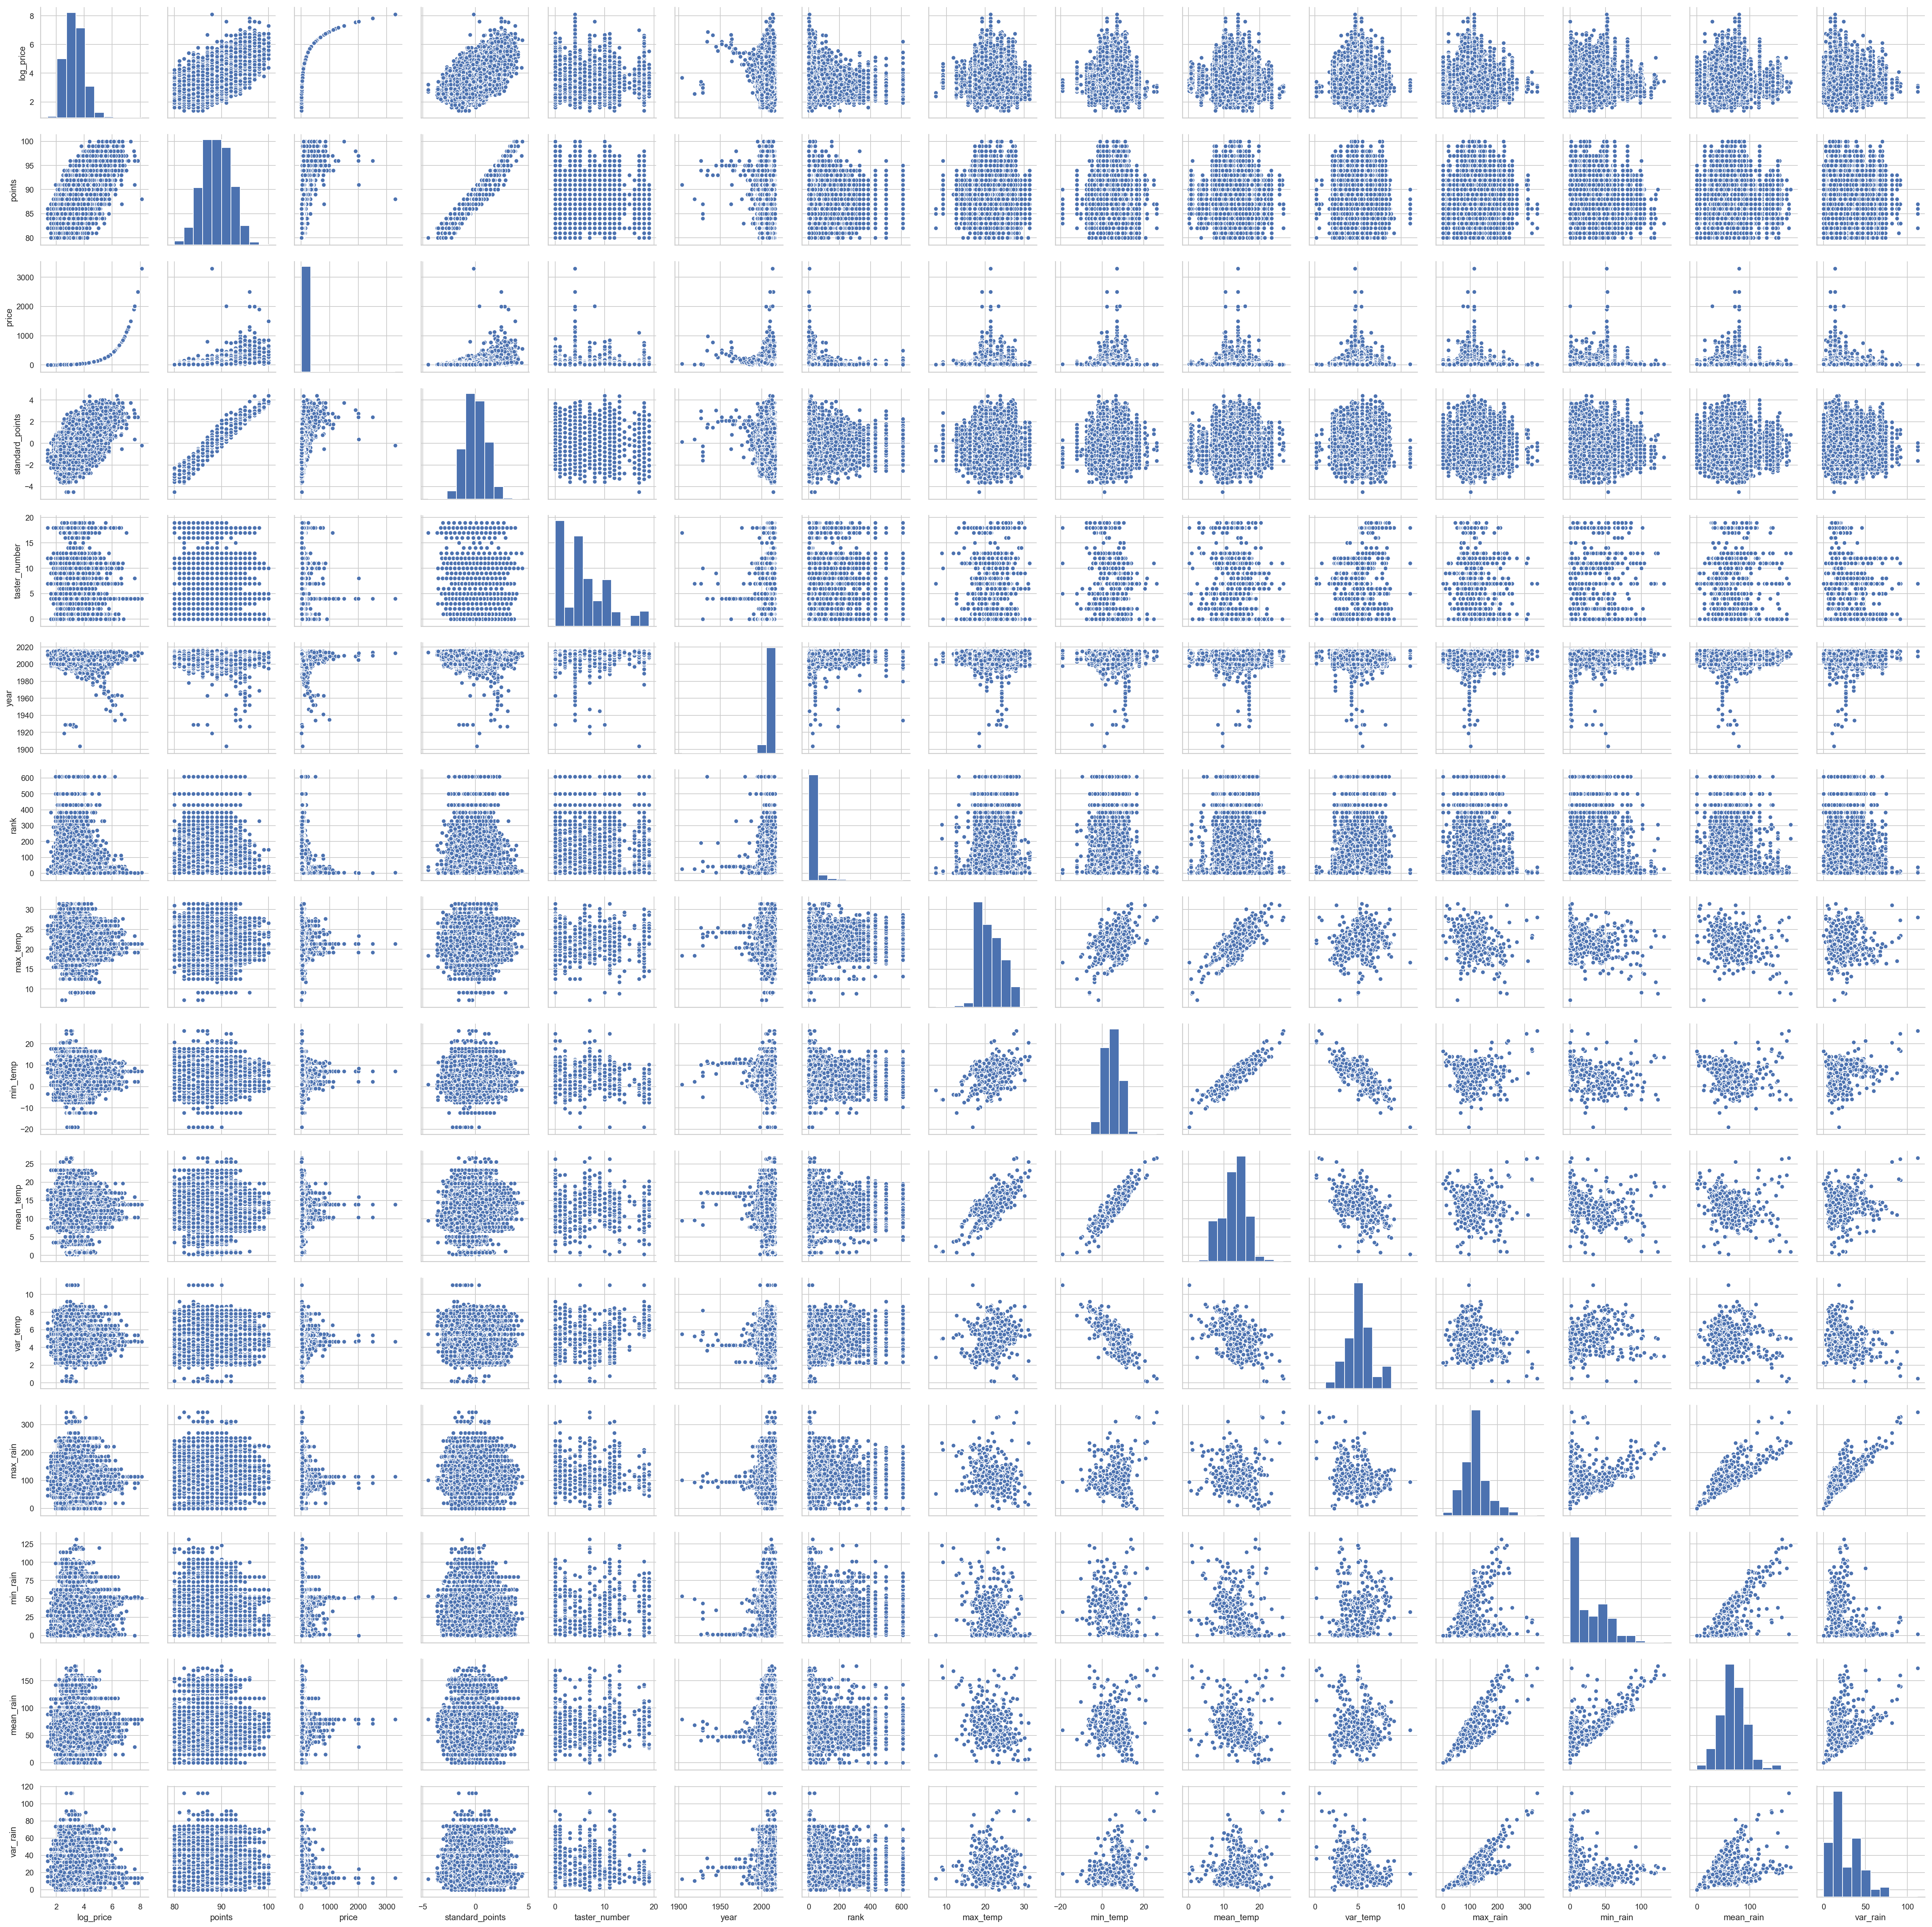

In [47]:
sns.pairplot(wine_plot)

In [48]:
from sklearn.linear_model import LinearRegression

X0 = wine[['points', 'standard_points',  'year', 'rank', 'Aug_rain', 'Jan_rain', 'Jun_temp', 'Sep_temp', 'max_temp', 'min_temp', 'mean_temp',
       'var_temp', 'max_rain', 'min_rain', 'mean_rain', 'var_rain']]
X = sm.add_constant(X0)
y = wine["log_price"] 

In [49]:
# LinearRegression 회귀분석
model= LinearRegression().fit(X0, y)
print(model.coef_, model.intercept_)

[ 0.12399822  0.01010356 -0.02540484 -0.00056976 -0.00227075  0.0011617
  0.00994012  0.00618671 -0.05847721 -0.05585453  0.09289163  0.0019548
  0.00648547  0.01063072 -0.01296494 -0.00471122] 43.4158656327861


### 2. 2 OLS 부분회귀

In [51]:
model = sm.OLS(y, X)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     5609.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:09:27   Log-Likelihood:                -82701.
No. Observations:              116765   AIC:                         1.654e+05
Df Residuals:                  116748   BIC:                         1.656e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              43.4159      0.783     

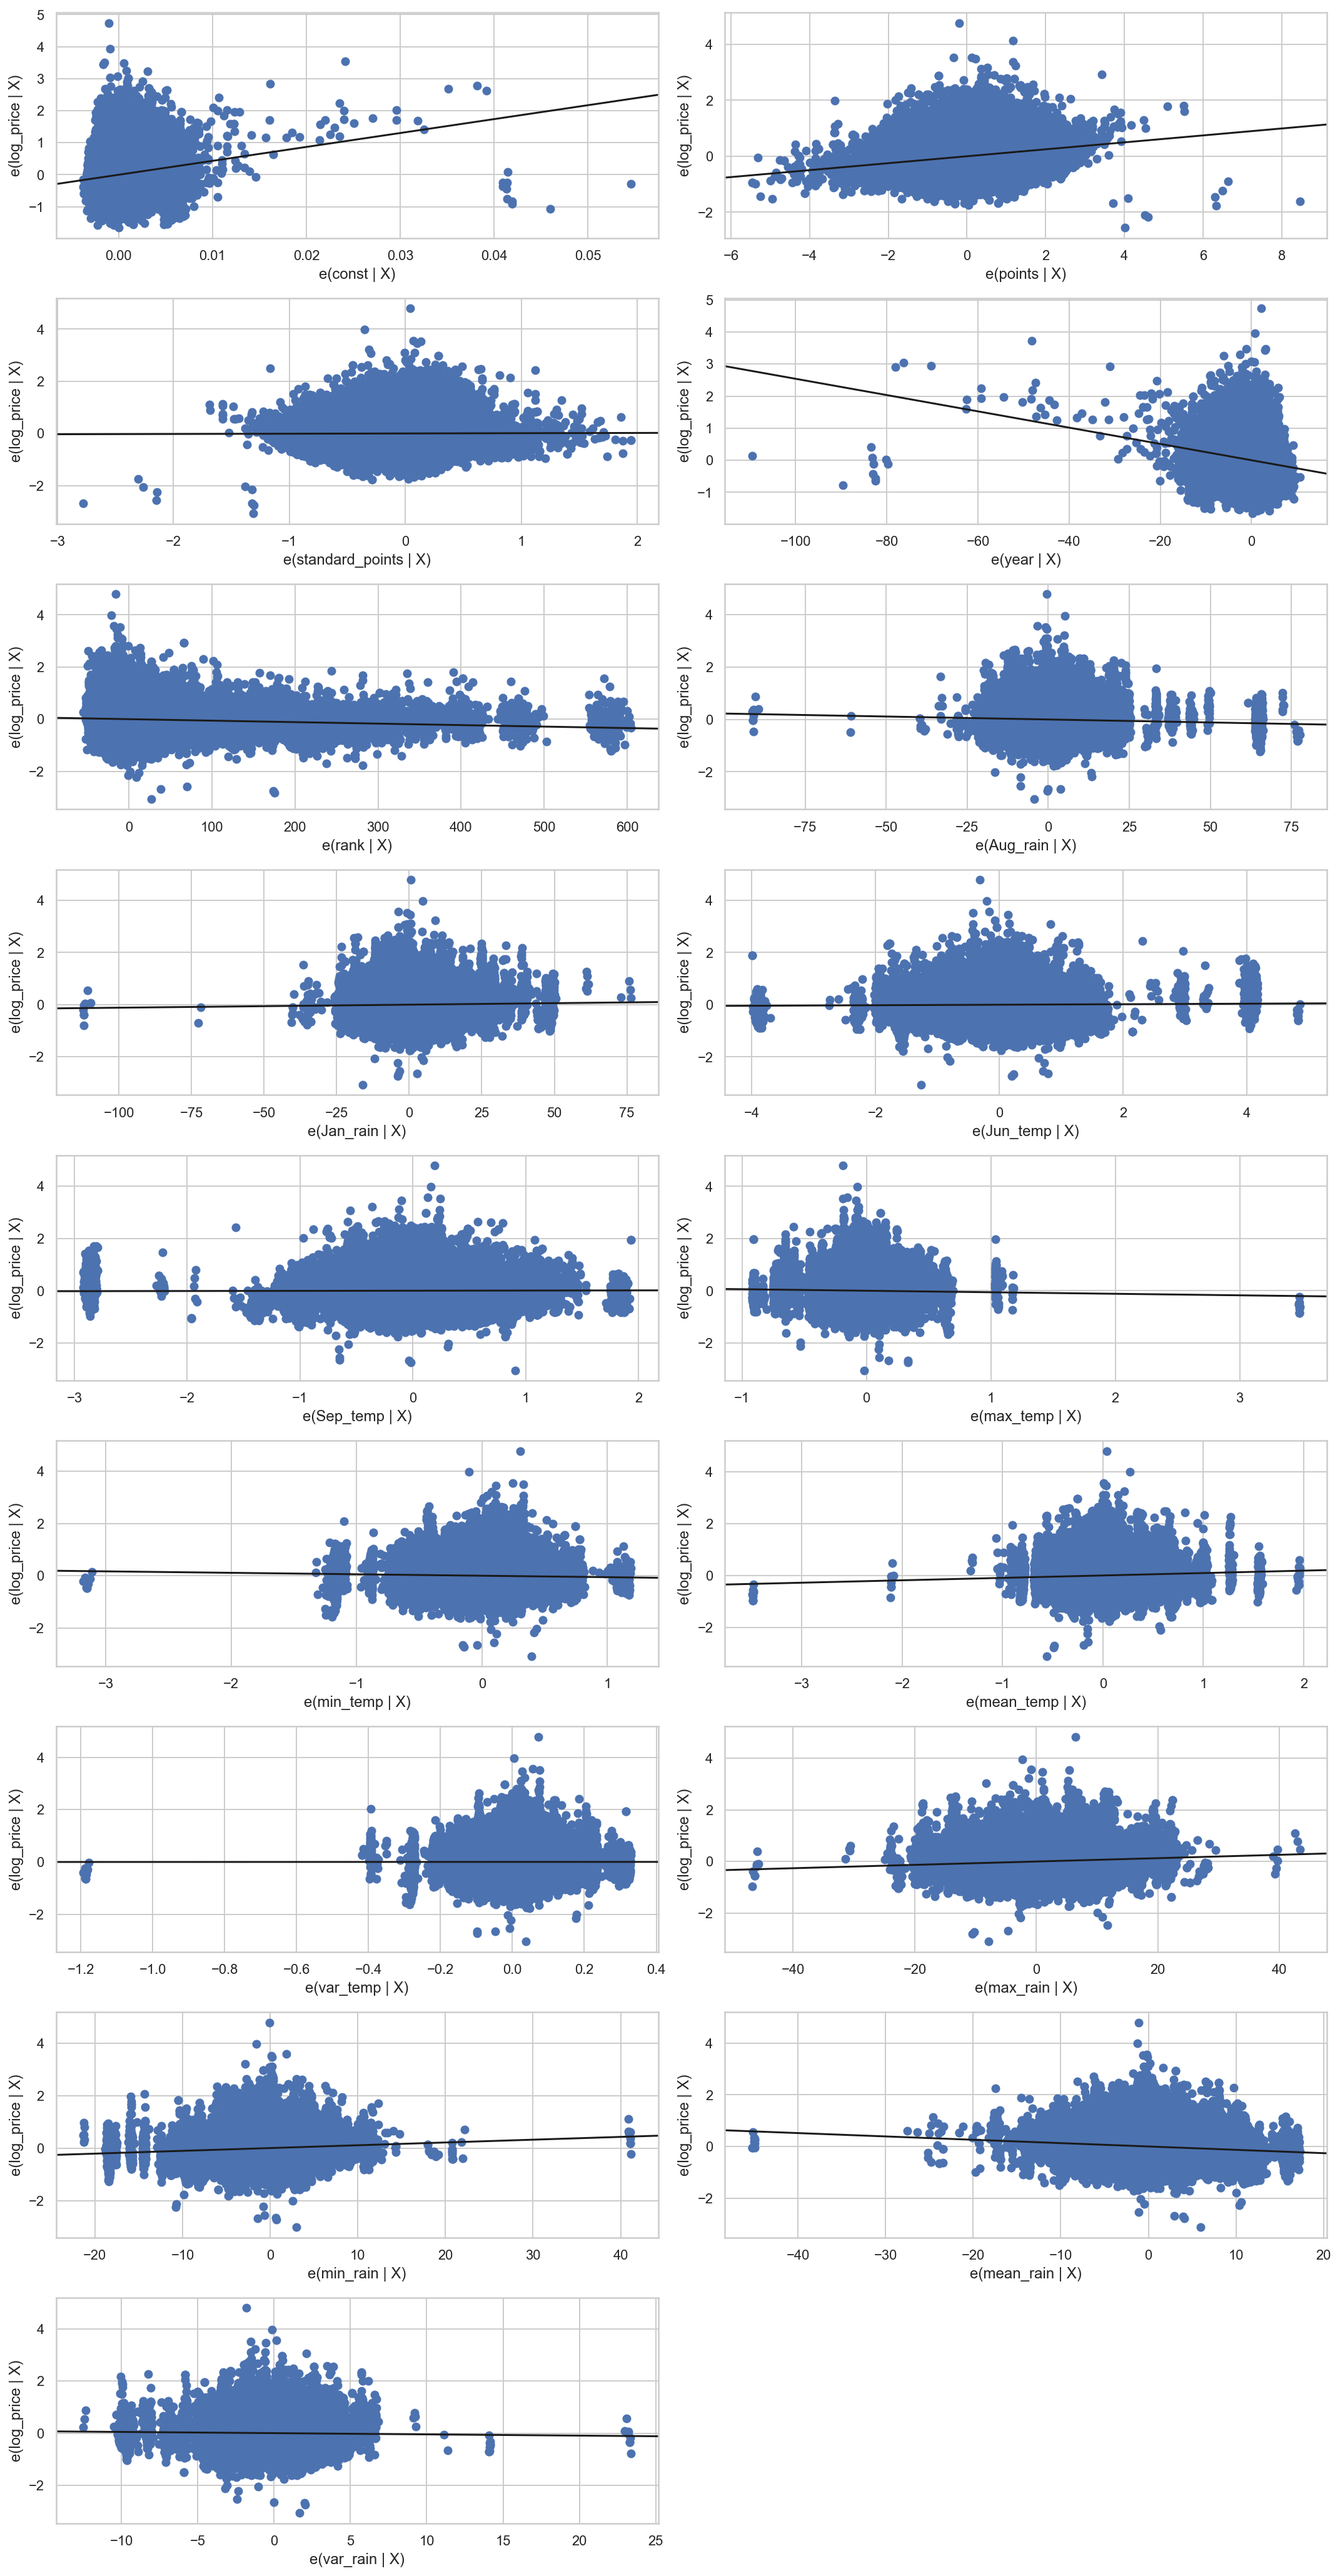

In [52]:
model_wine = sm.OLS(y, X)
result_wine = model_wine.fit()

fig = plt.figure(figsize=(15, 30))
sm.graphics.plot_partregress_grid(result_wine, fig=fig)
fig.suptitle("")
plt.show()

### To Do

### Reference

- Ashenfelter, O. and K. Storchmann (2006). Using a Hedonic Model of Solar Radiation to Assess the Economic Effect of Climate Change: The Case of Mosel Valley Vineyards, NBER Working Paper No. 12380, July 2006.
- Sung Cheol Yun, Imputation of Missing values. Journal of Preventive Medicine and Public Health 2004;37(3): 209-211.
- https://www.kaggle.com/amanajmera1/linear-regression-model-on-wine-dataset/report
- https://climateknowledgeportal.worldbank.org/download-data
- https://datascienceschool.net/